### Stock Price Predictor 

In this project, we will work on a time series problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  

In this project, we will develop our stock price predictor using only these two predictors. Here we are using SVM, Regression algorithms  as they works best as compared to any other machine learning algorithms, ofcourse ensembling learning, stacking will work.
Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 


In [ ]:
#pip install yfinance 

In [1]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [2]:
stocks = input("Enter the code of the stock:- ") # GC=F for GOlD
data = yf.download(stocks, "2020-01-01", "2024-01-01", auto_adjust=True) 
data.head()


Enter the code of the stock:-  gc=f


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,214
2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,107
2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,416
2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,47
2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,236


In [14]:
data.shape 

(1007, 5)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1007 non-null   float64
 1   High    1007 non-null   float64
 2   Low     1007 non-null   float64
 3   Close   1007 non-null   float64
 4   Volume  1007 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [16]:
data.describe()

,Open,High,Low,Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1828.224827,1837.602384,1819.079146,1828.325718,4385.268123
std,114.159337,113.764866,114.653137,114.046079,24057.326026
min,1469.300049,1484.000000,1452.099976,1477.300049,0.000000
25%,1759.050049,1767.200012,1749.900024,1757.799988,83.000000
50%,1826.099976,1833.900024,1817.500000,1828.699951,248.000000
75%,1920.049988,1927.550049,1911.549988,1919.099976,666.000000
max,2081.600098,2130.199951,2066.500000,2081.899902,251274.000000


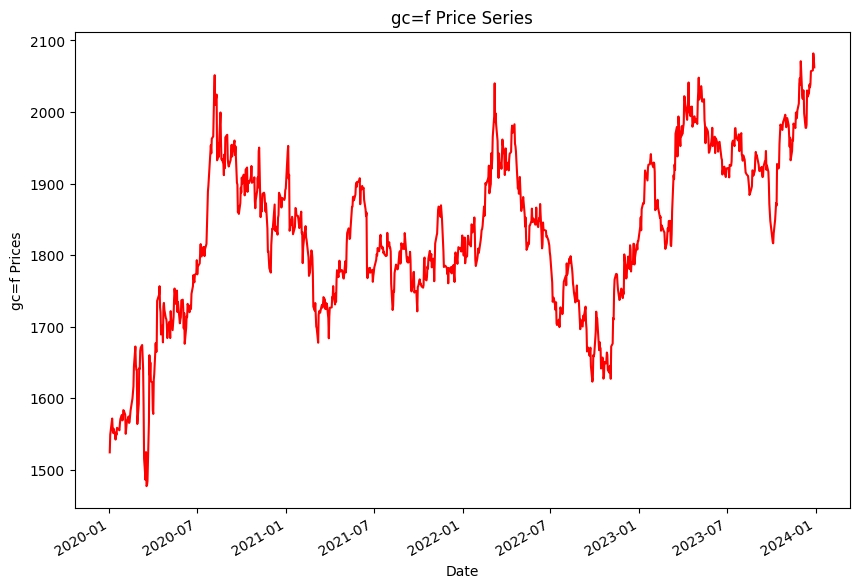

In [17]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<Axes: xlabel='Close', ylabel='Count'>

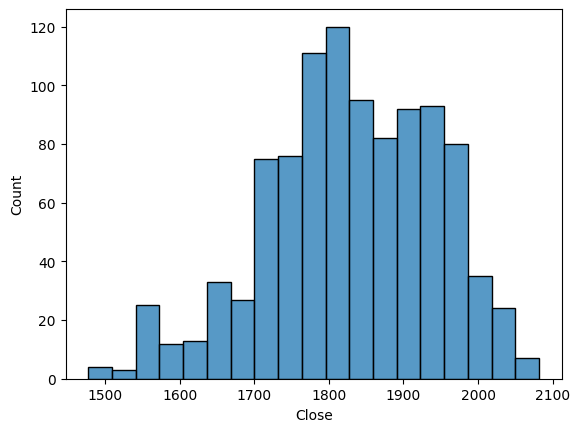

In [18]:
sns.histplot(data["Close"])

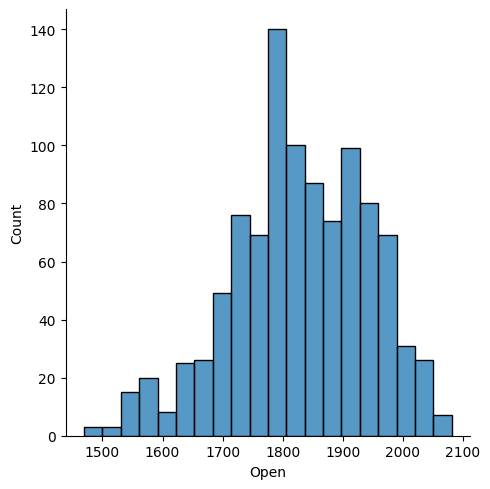

In [19]:
sns.displot(data["Open"])

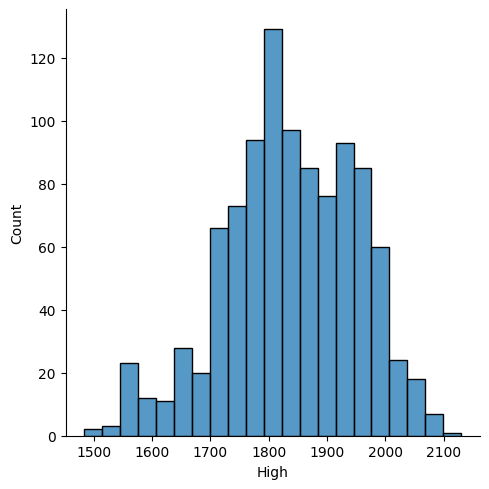

In [20]:
sns.displot(data["High"])

In [21]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(805, 4)
(202, 4)
(805,)
(202,)


In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [23]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  41.75881127762899
RMSE:-  6.462105792822413
R2_score:-  0.996844312038679


In [24]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [25]:
calculate_metrics(y_test, la_p)

MSE:-  41.7521137012786
RMSE:-  6.461587552705496
R2_score:-  0.9968448181704488


In [26]:
calculate_metrics(y_test, ri_p)

MSE:-  41.758873900879756
RMSE:-  6.462110638241948
R2_score:-  0.996844307306278


In [31]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {
    'C': [0.1, 1, 10, 100, 1000,10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': [ 'rbf', 'sigmoid'],
    'epsilon': [0.1, 0.2, 0.5, 0.3]
}


grid = GridSearchCV(SVR(), param_grid, refit=True)    
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']})

In [32]:
best_model = grid.best_estimator_
best_params = grid.best_params_
print(best_model)
print(best_params)

SVR(C=1000, epsilon=0.3, gamma=0.0001)
{'C': 1000, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'rbf'}


In [34]:
svr = SVR(C= 1000, epsilon = 0.3,gamma= 0.0001, kernel= 'rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 
calculate_metrics(y_test, svr_pred)

MSE:-  1469.2685025089033
RMSE:-  38.33103836982379
R2_score:-  0.8889682731989209


In [35]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

# Reference 

This notebook taken from the course offered by Ayush as a part of ML001 Course. I made few modifications and experiment out to understand better.

Youtube link: https://www.youtube.com/watch?v=OuWlw79g1Ow&list=PLITqwrDNk9XDyoAoVbXKbgRBMJK5NrQcB

Github link: https://github.com/ayush714/ML001-Project-Sources-Code-and-Learning-Materials